# Classification

![galaxies](assets/classification/hubble_tuning_fork.jpg)

(image: [NASA](https://imagine.gsfc.nasa.gov/educators/programs/cosmictimes/educators/guide/1929/nebulae.html))

## Where are we?

![one of many cheatsheets but I keep using it](assets/linear-regression/machine-learning-cheet-sheet.png)

(image: [sas.com](https://www.sas.com/en_us/insights/analytics/machine-learning.html))

## Classification

Given a sample with $n$ independent features

$X^i = [x^i_1, x^i_2, ..., x^i_n]$

Predict the probability $P(y)$ that this sample belongs to a class $y$

i.e. we "classify" the sample as belonging to $y$

## Algorithms for Classification

- Logistic Regression
- Naive Bayes
- K-nearest Neighbours
- Support Vector Machines
- Decision Trees and Forests
- Neural Networks
- ...

## Logistic Regression

Linear Regression + either Activation or Softmax

Activation: Binary Classification

Softmax: Multi-class Classification

## Binary

![your mood today?](assets/classification/logistic-regression.png)

(image: dataaspirant.com)

## Logistic Sigmoid

Converts the output to a value between 0 and 1
- 1 can mean True, Happy, ...
- 0 can mean False, Sad, ...

$$\sigma(x) = \frac{1}{1+exp(-x)}$$

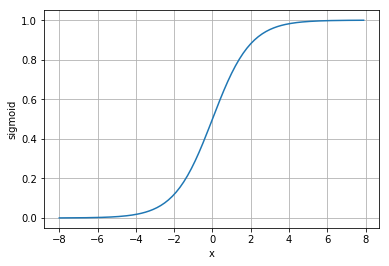

In [10]:
# Credits: https://ilparle.com/2017/04/21/plot-a-simple-sigmoid-function/
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-8, 8, 0.1)
sigmoid = 1 / (1 + np.exp(-x))

fig, ax = plt.subplots()
ax.plot(x, sigmoid)
ax.set(xlabel = 'x', ylabel = 'sigmoid')
ax.grid()

## Multi-Class

![mnist logistic regression](assets/classification/mnist-logistic-regression.png)

(image: [CNTK](https://cntk.ai/pythondocs/CNTK_103B_MNIST_LogisticRegression.html))

## Softmax

Softmax:
- Converts multiple outputs to a percentage distribution between 0 and 1
- Percentage distribution: numbers all add up to 1 (100%)
- Outputs: 0.7 happy, 0.2 depressed, 0.1 unknown

Example: [1, 2, 3, 4, 1, 2, 3]

Result: [0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]

In [11]:
# Credits: https://en.wikipedia.org/wiki/Softmax_function
import numpy as np

z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
softmax = lambda x : np.exp(x)/np.sum(np.exp(x))
softmax(z)

array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
       0.06426166, 0.1746813 ])

![binary v. multiclass](assets/classification/binary_v_multiclass.png)

(image: [CNTK](https://cntk.ai/pythondocs/CNTK_103B_MNIST_LogisticRegression.html))

## Libraries

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [51]:
# Iris flower dataset
# https://archive.ics.uci.edu/ml/datasets/iris

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

print('First 5 training data:', X_train[:5])
print('First 5 training labels:', y_train[:5])

First 5 training data: [[5.4 3.7 1.5 0.2]
 [5.  3.  1.6 0.2]
 [4.3 3.  1.1 0.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.1 4.4 1.4]]
First 5 training labels: [0 0 0 2 1]


In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Number of mislabeled points out of test set of %d points:' % (X_test.shape[0]))
print('Logistic Regression: %d, Score: %f' % ((y_test != y_pred_lr).sum(), lr.score(X_test, y_test)))

Number of mislabeled points out of test set of 45 points:
Logistic Regression: 2, Score: 0.955556


## Naive Bayes Classification

![naive bayes](assets/classification/naive-bayes.png)

(image: [shatterline.com](http://shatterline.com/blog/2013/09/12/not-so-naive-classification-with-the-naive-bayes-classifier/))

## Bayes Theorem

- Inputs: independent features
- Outputs: class probabilities
  - Bayes Theorem computes the conditional probabilities

## Libraries

http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes

- Gaussian
- Multinomial
- Bernoulli

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mndb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train, y_train)
mndb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

y_pred_gaussian = gnb.predict(X_test)
y_pred_multinomial = mndb.predict(X_test)
y_pred_bernoulli = bnb.predict(X_test)

print('Number of mislabeled points out of test set of %d points:' % (X_test.shape[0]))
print('\tGaussian: %d' % (y_test != y_pred_gaussian).sum())
print('\tMultinomialNB: %d' % (y_test != y_pred_multinomial).sum())
print('\tBernoulliNB: %d' % (y_test != y_pred_bernoulli).sum())

print('Scores:')
print('\tGaussian: %.2f' % gnb.score(X_test, y_test))
print('\tMultinomialNB: %.2f' % mndb.score(X_test, y_test))
print('\tBernoulliNB: %.2f' % bnb.score(X_test, y_test))

Number of mislabeled points out of test set of 45 points:
	Gaussian: 2
	MultinomialNB: 7
	BernoulliNB: 33
Scores:
	Gaussian: 0.96
	MultinomialNB: 0.84
	BernoulliNB: 0.27


## Support Vector Machines

![svm](assets/classification/svm.png)

(image: [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine))

## Support Vector Machines

- Inputs: features (not necessarily independent)
- Output: classes, separated by "hyperplane"

- SVM uses "kernel functions" to compute the similarity between input samples
- Find hyperplane with the maximum margin of separation
  - Why? Better generalization

## Libraries

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- Support Vector Classifier
- Different kernel functions to choose from

Scikit-learn has a nifty example that shows how the different kernel functions look like.

To illustrate them, we'll use their code example to train SVM models with only 2 features.
- Why 2 features? Because it's easier to plot in 2-D

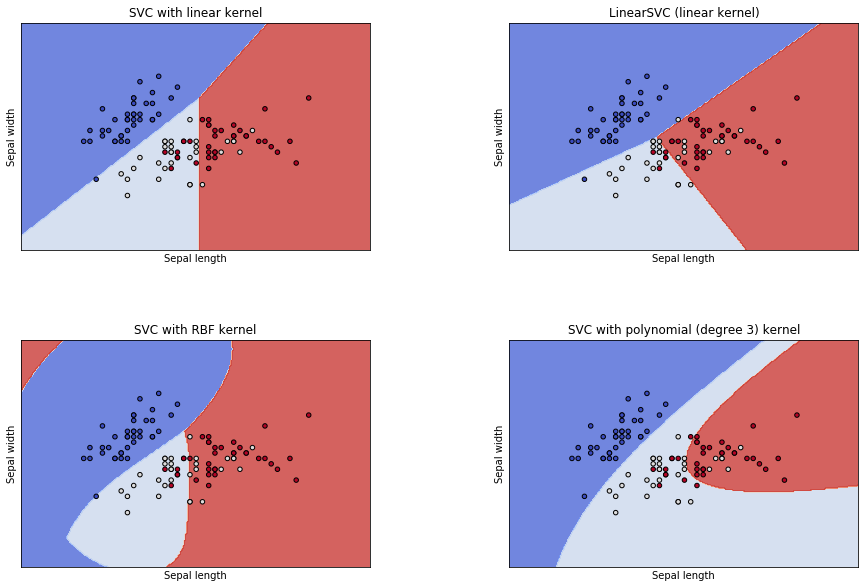

In [56]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Args:
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

    Returns:
        xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Args:
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Take the first two features. We could avoid this by using a two-dim dataset
X_train_svc = X_train[:, :2]

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svm_2D_models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
svm_2D_models = (clf.fit(X_train_svc, y_train) for clf in svm_2D_models)

X0, X1 = X_train_svc[:, 0], X_train_svc[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(svm_2D_models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Let's compare the performance of SVM with the other Classification models (Logistic Regression, Naive Bayes)

To do that, we retrain the SVM models with the full features.

In [58]:
C = 1.0  # SVM regularization parameter
svm_models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, C=C))
svm_models = (clf.fit(X_train, y_train) for clf in svm_models)

print('Number of mislabeled points out of test set of %d points:' % (X_test.shape[0]))
for model, title in zip(svm_models, titles):
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('\t%s: %d, score %.2f' % (title, (y_test != y_pred).sum(), score))

Number of mislabeled points out of test set of 45 points:
	SVC with linear kernel: 0, score 1.00
	LinearSVC (linear kernel): 2, score 0.96
	SVC with RBF kernel: 2, score 0.96
	SVC with polynomial (degree 3) kernel: 1, score 0.98


## Comparisons

|Criteria|Logistic Regression|Naive Bayes|SVM|
|--|--|--|--|
|Interpretability|Simple|Very simple|Hard to understand parameters|
|Easy of training|Fast to train|Fast to train|Computationally and memory intensive for large number of features|
|Requires independent features|Yes, but may still work|Yes, assumes independence|No (don't care if correlated)|
|Output|Returns probabilities|Returns probabilities|Only returns category, no probabilities|
